<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span><ul class="toc-item"><li><span><a href="#16S-arch" data-toc-modified-id="16S-arch-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>16S-arch</a></span></li><li><span><a href="#16S-uni" data-toc-modified-id="16S-uni-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>16S-uni</a></span><ul class="toc-item"><li><span><a href="#Renaming-samples" data-toc-modified-id="Renaming-samples-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Renaming samples</a></span></li></ul></li></ul></li><li><span><a href="#Rarefy" data-toc-modified-id="Rarefy-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Rarefy</a></span></li><li><span><a href="#Format" data-toc-modified-id="Format-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Format</a></span><ul class="toc-item"><li><span><a href="#Checks" data-toc-modified-id="Checks-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Checks</a></span></li></ul></li><li><span><a href="#Sample-distribution" data-toc-modified-id="Sample-distribution-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Sample distribution</a></span></li><li><span><a href="#Archaeal-diversity" data-toc-modified-id="Archaeal-diversity-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Archaeal diversity</a></span><ul class="toc-item"><li><span><a href="#Taxonomic-comparison" data-toc-modified-id="Taxonomic-comparison-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Taxonomic comparison</a></span></li><li><span><a href="#Prevalence-across-host-species" data-toc-modified-id="Prevalence-across-host-species-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Prevalence across host species</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Writing-output" data-toc-modified-id="Writing-output-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Writing output</a></span></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Format the dataset
  * Just overlapping samples between the 2 16S rRNA sequence datasets

# Var

In [1]:
work_dir = '/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/arch-bac/'

# 16S-arch phyloseq object
physeq_arch_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/merged/phyloseq/physeq_arch.RDS'

# `Youngblut et al., 2019` phyloseq object (raw counts)
physeq_uni_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/phyloseq/physeq.RDS'

# Init

In [2]:
library(dplyr)
library(tidyr)
library(ggplot2)

library(phyloseq)

library(LeyLabRMisc)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
df.dims()
make_dir(work_dir)
my_seed = 2341

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/arch-bac/ 


# Load

## 16S-arch

In [4]:
physeq_arch = readRDS(physeq_arch_file)
physeq_arch

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2091 taxa and 203 samples ]
sample_data() Sample Data:       [ 203 samples by 74 sample variables ]
tax_table()   Taxonomy Table:    [ 2091 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 2091 tips and 2088 internal nodes ]

In [5]:
physeq_arch %>% sample_sums %>% summary_x

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
.,251,756,1646,2516.133,3334,32294,12540.27,5119.543


## 16S-uni

In [6]:
physeq_uni = readRDS(physeq_uni_file)
physeq_uni

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 39903 taxa and 273 samples ]
sample_data() Sample Data:       [ 273 samples by 171 sample variables ]
tax_table()   Taxonomy Table:    [ 39903 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 39903 tips and 39154 internal nodes ]

In [7]:
physeq_uni %>% sample_sums %>% summary_x

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
.,1,10952,61190,55449.34,79382,228007,82088.6,33512.53


### Renaming samples

In [8]:
sample_names(physeq_uni) =  physeq_uni %>% sample_names %>% gsub('\\.', '_', .)
physeq_uni

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 39903 taxa and 273 samples ]
sample_data() Sample Data:       [ 273 samples by 171 sample variables ]
tax_table()   Taxonomy Table:    [ 39903 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 39903 tips and 39154 internal nodes ]

# Rarefy

In [9]:
# universal; first filtering out archaea
physeq_uni_f = physeq_uni %>%
    rarefy_even_depth(sample.size=5000, replace=FALSE, rngseed=my_seed) 
## pruning            
x = taxa_sums(physeq_uni_f) > 0
physeq_uni_f = prune_taxa(names(x[x==TRUE]), physeq_uni_f)
# summary
physeq_uni_f

`set.seed(2341)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(2341); .Random.seed` for the full vector

...

57 samples removedbecause they contained fewer reads than `sample.size`.

Up to first five removed samples are: 


X104_European_RobinX112_Eurasian_SparrowhawkX113_Eurasian_WoodcockX121_Raccoon_DogX135_Horse

...

9337OTUs were removed because they are no longer 
present in any sample after random subsampling


...



phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 30566 taxa and 216 samples ]
sample_data() Sample Data:       [ 216 samples by 171 sample variables ]
tax_table()   Taxonomy Table:    [ 30566 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 30566 tips and 30018 internal nodes ]

In [10]:
# 16S-arch
physeq_arch_f = physeq_arch %>%
    rarefy_even_depth(sample.size=250, replace=FALSE, rngseed=my_seed)
## pruning
x = taxa_sums(physeq_arch_f) > 0
physeq_arch_f = prune_taxa(names(x[x==TRUE]), physeq_arch_f)
## summary
physeq_arch_f

`set.seed(2341)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(2341); .Random.seed` for the full vector

...

691OTUs were removed because they are no longer 
present in any sample after random subsampling


...



phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1400 taxa and 203 samples ]
sample_data() Sample Data:       [ 203 samples by 74 sample variables ]
tax_table()   Taxonomy Table:    [ 1400 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1400 tips and 1397 internal nodes ]

# Format

In [11]:
# overlapping samples
overlap(physeq_arch_f %>% sample_names,
        physeq_uni_f %>% sample_names) #%>% gsub('\\.', '_', .))

intersect(x,y): 140 
setdiff(x,y): 63 
setdiff(y,x): 76 
union(x,y): 279 


In [12]:
# missing any?
df.dims(20)
overlap(physeq_arch_f %>% sample_names,
        physeq_uni_f %>% sample_names, #%>% gsub('\\.', '_', .),
        to_return='diff_fuzzy')  %>%
    head(n=20)
df.dims()

,x,y,dist
,<fct>,<fct>,<dbl>
1329,X146_Cattle,X144_Cattle,1
1385,X142_Cattle,X144_Cattle,1
2998,X305_European_Hare,X301_European_Hare,1
4019,X391_European_Ground_Squirrel,X390_European_Ground_Squirrel,1
5283,X421_Common_Hippopotamus,X422_Common_Hippopotamus,1
8664,X265_Western_Marsh_Harrier,X266_Western_Marsh_Harrier,1
9487,X305_European_Hare,X302_European_Hare,1
9550,X305_European_Hare,X304_European_Hare,1
9613,X305_European_Hare,X306_European_Hare,1


In [13]:
# getting just overlap
to_keep = overlap(physeq_arch_f %>% sample_names,
                  physeq_uni_f %>% sample_names, # %>% gsub('\\.', '_', .),
                  diff='int')  
to_keep %>% length

[1] 140

In [14]:
# subset
physeq_arch_ff = physeq_arch_f %>% prune_samples(to_keep, .)
physeq_arch_ff

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1400 taxa and 140 samples ]
sample_data() Sample Data:       [ 140 samples by 74 sample variables ]
tax_table()   Taxonomy Table:    [ 1400 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1400 tips and 1397 internal nodes ]

In [15]:
# subset
physeq_uni_ff = physeq_uni_f %>% prune_samples(to_keep, .)
physeq_uni_ff

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 30566 taxa and 140 samples ]
sample_data() Sample Data:       [ 140 samples by 171 sample variables ]
tax_table()   Taxonomy Table:    [ 30566 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 30566 tips and 30018 internal nodes ]

## Checks

In [16]:
physeq_arch_ff %>% sample_sums %>% summary_x

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
.,250,250,250,250,250,250,0,0


In [17]:
physeq_uni_ff %>% sample_sums %>% summary_x

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
.,5000,5000,5000,5000,5000,5000,0,0


# Sample distribution

In [18]:
meta_s = physeq_arch_ff %>%
    phyloseq2df(sample_data) %>%
    group_by(class, order, family, genus, scientific_name,
             diet, habitat, captive_wild, sample_type) %>%
    summarize(n_samples = n(),
              .groups='drop')
meta_s

class,order,family,genus,scientific_name,diet,habitat,captive_wild,sample_type,n_samples
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
Actinopterygii,Cypriniformes,Cyprinidae,Blicca,Blicca_bjoerkna,omnivore,aquatic habitat,wild,feces,2
Actinopterygii,Cypriniformes,Cyprinidae,Carassius,Carassius_gibelio,omnivore,aquatic habitat,wild,feces,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Reptilia,Squamata,Testudinidae,Testudo,Testudo_hermanni,omnivore,terrestrial habitat,wild,feces,1
Reptilia,Squamata,Viperidae,Vipera,Vipera_ursinii,carnivore,terrestrial habitat,wild,feces,1


In [19]:
# samples per group
df.dims(20)
meta_s %>%
    group_by(class) %>%
    summarize(n_samples = sum(n_samples),
              .groups = 'drop')
df.dims()

class,n_samples
<chr>,<int>
Actinopterygii,5
Amphibia,2
Aves,18
Mammalia,108
Reptilia,7


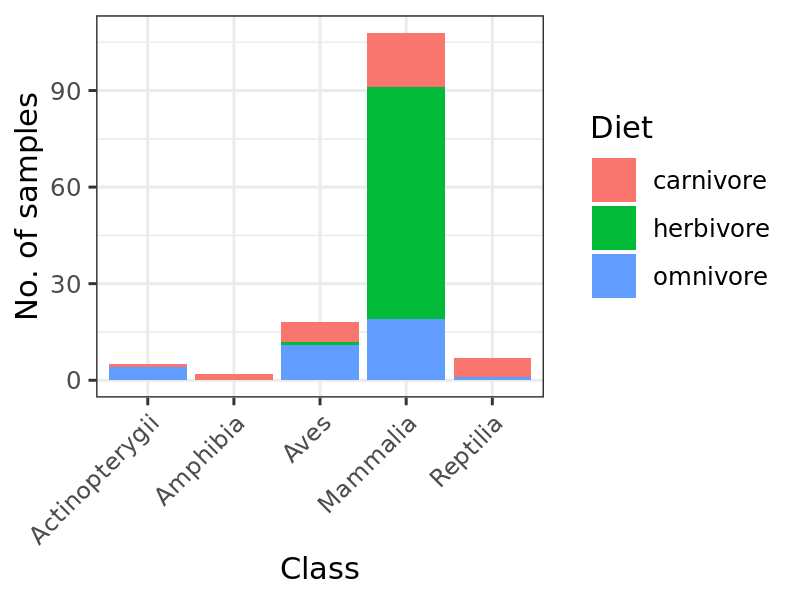

In [20]:
# number of samples per class & diet
p = meta_s %>%
    group_by(class, diet) %>%
    summarize(n_samples = sum(n_samples),
              .groups='drop') %>%
    ggplot(aes(class, n_samples, fill=diet)) +
    geom_bar(stat='identity') +
    scale_fill_discrete('Diet') +
    labs(x='Class', y='No. of samples') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

p.dims(4,3)
plot(p)

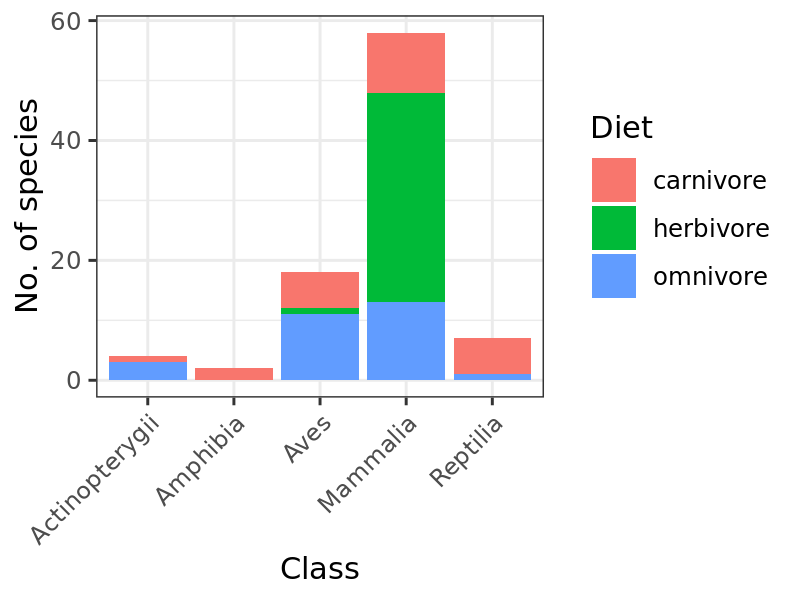

In [21]:
# number of species
p = meta_s %>%
    group_by(class, diet) %>%
    summarize(n_species = scientific_name %>% unique %>% length,
              .groups='drop') %>%
    ggplot(aes(class, n_species, fill=diet)) +
    geom_bar(stat='identity') +
    scale_fill_discrete('Diet') +
    labs(x='Class', y='No. of species') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

p.dims(4,3)
plot(p)

# Archaeal diversity

In [22]:
# just archaea for universal primers
physeq_uni_ff_arch = physeq_uni_ff %>%
    subset_taxa(Domain=='Archaea') 
physeq_uni_ff_arch

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 169 taxa and 140 samples ]
sample_data() Sample Data:       [ 140 samples by 171 sample variables ]
tax_table()   Taxonomy Table:    [ 169 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 169 tips and 168 internal nodes ]

In [23]:
# how many taxa for 16S-arch primers?
physeq_arch_ff

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1400 taxa and 140 samples ]
sample_data() Sample Data:       [ 140 samples by 74 sample variables ]
tax_table()   Taxonomy Table:    [ 1400 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1400 tips and 1397 internal nodes ]

## Taxonomic comparison

In [24]:
tax_uni = physeq_uni_ff_arch %>%
    phyloseq2df(tax_table)
tax_arc = physeq_arch_ff %>%
    phyloseq2df(tax_table)

uni = physeq_uni_ff_arch %>%
    phyloseq2df(otu_table, long = TRUE) %>%
    inner_join(tax_uni, c('OTU')) 

arc = physeq_arch_ff %>%
    phyloseq2df(otu_table, long = TRUE) %>%
    inner_join(tax_arc, c('OTU')) 

uni %>% .$OTU %>% unique_n('OTUs')
arc %>% .$OTU %>% unique_n('OTUs')

No. of unique OTUs: 169 
No. of unique OTUs: 1400 


In [25]:
# summarize & join
uni_s = uni %>%
    mutate(Taxonomy = paste(Phylum, Class, sep=';')) %>%
    group_by(Taxonomy) %>%
    summarize(n_OTUs = OTU %>% unique %>% length,
              .groups='drop')
arc_s = arc %>%
    mutate(Taxonomy = paste(Phylum, Class, sep=';')) %>%
    group_by(Taxonomy) %>%
    summarize(n_OTUs = OTU %>% unique %>% length,
              .groups='drop')

df = full_join(uni_s, arc_s, c('Taxonomy')) %>%
    gather(primers, n_OTUs, -Taxonomy) %>%
    mutate(primers = ifelse(primers == 'n_OTUs.x', '16S-uni', '16S-arc'))
df

Taxonomy,primers,n_OTUs
<chr>,<chr>,<int>
Euryarchaeota;Halobacteria,16S-uni,2
Euryarchaeota;Methanobacteria,16S-uni,78
⋮,⋮,⋮
Nanoarchaeaeota;Woesearchaeia,16S-arc,15
Thaumarchaeota;Nitrososphaeria,16S-arc,143


In [26]:
df.dims(30)
df %>% spread(primers, n_OTUs)
df.dims()

Taxonomy,16S-arc,16S-uni
<chr>,<int>,<int>
Asgardaeota;Odinarchaeia,1,NA
Crenarchaeota;Bathyarchaeia,18,NA
Diapherotrites;Iainarchaeia,1,NA
Euryarchaeota;Halobacteria,102,2
Euryarchaeota;Methanobacteria,699,78
Euryarchaeota;Methanomicrobia,239,29
Euryarchaeota;Thermoplasmata,174,53
Euryarchaeota;unclassified,8,NA
Nanoarchaeaeota;Woesearchaeia,15,NA


Warning message:
“Removed 7 rows containing missing values (geom_bar).”
Warning message:
“Removed 7 rows containing missing values (geom_text).”


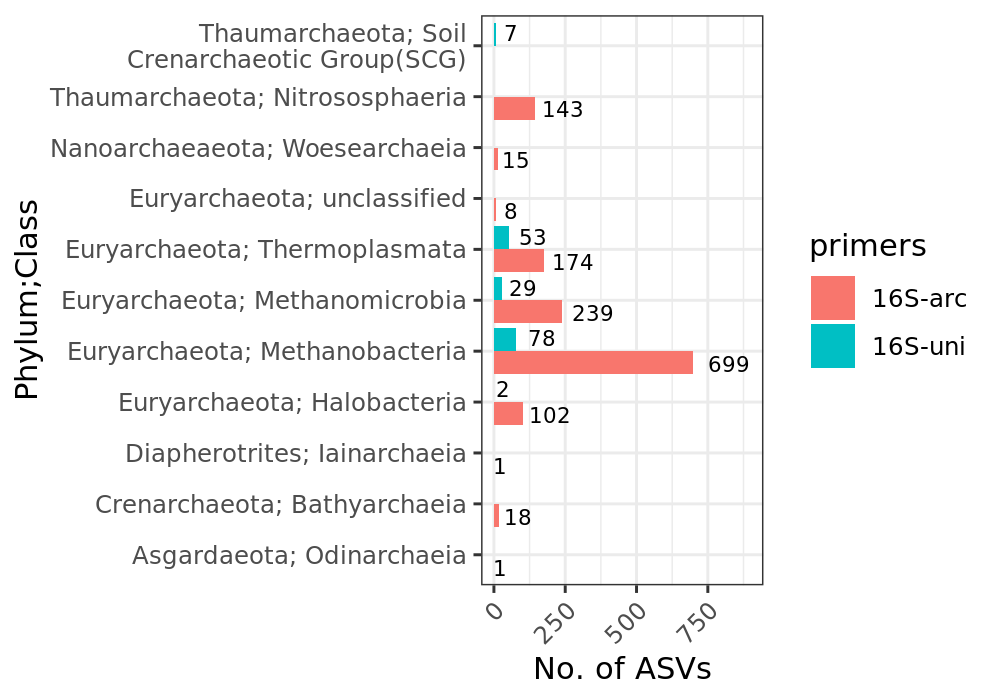

In [27]:
# plotting
p = df %>%
    mutate(Taxonomy = gsub(';', ';\n', Taxonomy),
           Taxonomy = stringr::str_wrap(Taxonomy, 32)) %>%
    ggplot(aes(Taxonomy, n_OTUs, fill=primers)) +
    geom_bar(stat='identity', position='dodge') +
    geom_text(aes(label=n_OTUs, y=n_OTUs + log(n_OTUs) * 16 + 20), 
              size=2.7,
              position = position_dodge(width = 1)) +
    scale_y_continuous(limits=c(0,900)) +
    labs(x='Phylum;Class', y='No. of ASVs') +
    coord_flip() +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

p.dims(5,3.5)
plot(p)

## Prevalence across host species

In [28]:
meta = physeq_arch_ff %>%
    phyloseq2df(sample_data)
meta

SampleID,host_subject_id,host_german_name,host_common_name,scientific_name,scientific_name_subspecies,host_taxid,class,order,family,⋯,season,samp_store_days,samp_collect_device,sampling_method,diet,feeding_style,digestive_system,digestive_system_detail,Sample,total_count
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
F35_Red_Deer,F35,Rothirsch,Red.Deer,Cervus_elaphus,NA,9860,Mammalia,Artiodactyla,Cervidae,⋯,autumn,229,Greiner Polystyrene 30ml Faeces Container,feces sampling,herbivore,intermediate type,foregut,foregut,F35_Red_Deer,1874
F36_Red_Deer,F36,Rothirsch,Red.Deer,Cervus_elaphus,NA,9860,Mammalia,Artiodactyla,Cervidae,⋯,autumn,229,Greiner Polystyrene 30ml Faeces Container,feces sampling,herbivore,intermediate type,foregut,foregut,F36_Red_Deer,3369
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X431_Quagga,431,Steppenzebra,Quagga,Equus_quagga,NA,89252,Mammalia,Perissodactyla,Equidae,⋯,autumn,NA,Screw cap vial,feces sampling,herbivore,NA,hindgut,colon,X431_Quagga,2433
X67_European_Roe,67,Reh,European.Roe,Capreolus_capreolus,NA,9858,Mammalia,Artiodactyla,Cervidae,⋯,autumn,#VALUE!,Screw cap vial,feces sampling,herbivore,concentrate selector,foregut,foregut,X67_European_Roe,721


In [29]:
# summarize
uni_s = uni %>%
    inner_join(meta, c('Sample')) %>%
    mutate(Taxonomy = paste(Phylum, Class, sep='; ')) %>%
    group_by(class, diet) %>%
    mutate(n_samples = Sample %>% unique %>% length) %>%
    group_by(Taxonomy, class, diet, scientific_name) %>%
    summarize(present = sum(Count) > 0,
              .groups = 'drop') 
uni_s   

Taxonomy,class,diet,scientific_name,present
<chr>,<chr>,<chr>,<chr>,<lgl>
Euryarchaeota; Halobacteria,Actinopterygii,carnivore,Leuciscus_idus,FALSE
Euryarchaeota; Halobacteria,Actinopterygii,omnivore,Blicca_bjoerkna,FALSE
⋮,⋮,⋮,⋮,⋮
Thaumarchaeota; Soil Crenarchaeotic Group(SCG),Reptilia,carnivore,Zamenis_longissimus,TRUE
Thaumarchaeota; Soil Crenarchaeotic Group(SCG),Reptilia,omnivore,Testudo_hermanni,FALSE


In [30]:
# summarize
arc_s = arc %>%
    inner_join(meta, c('Sample')) %>%
    mutate(Taxonomy = paste(Phylum, Class, sep='; ')) %>%
    group_by(class, diet) %>%
    mutate(n_samples = Sample %>% unique %>% length) %>%
    group_by(Taxonomy, class, diet, scientific_name) %>%
    summarize(present = sum(Count) > 0,
              .groups = 'drop') 
arc_s   

Taxonomy,class,diet,scientific_name,present
<chr>,<chr>,<chr>,<chr>,<lgl>
Asgardaeota; Odinarchaeia,Actinopterygii,carnivore,Leuciscus_idus,FALSE
Asgardaeota; Odinarchaeia,Actinopterygii,omnivore,Blicca_bjoerkna,FALSE
⋮,⋮,⋮,⋮,⋮
Thaumarchaeota; Nitrososphaeria,Reptilia,carnivore,Zamenis_longissimus,TRUE
Thaumarchaeota; Nitrososphaeria,Reptilia,omnivore,Testudo_hermanni,FALSE


In [31]:
# join
df = full_join(uni_s, arc_s, c('Taxonomy', 'class', 'diet', 'scientific_name')) %>%
    gather(primer, present, -Taxonomy, -class, -diet, -scientific_name) %>%
    mutate(primer = ifelse(primer == 'present.x', '16S-uni', '16S-arc')) 
df

Taxonomy,class,diet,scientific_name,primer,present
<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
Euryarchaeota; Halobacteria,Actinopterygii,carnivore,Leuciscus_idus,16S-uni,FALSE
Euryarchaeota; Halobacteria,Actinopterygii,omnivore,Blicca_bjoerkna,16S-uni,FALSE
⋮,⋮,⋮,⋮,⋮,⋮
Thaumarchaeota; Nitrososphaeria,Reptilia,carnivore,Zamenis_longissimus,16S-arc,TRUE
Thaumarchaeota; Nitrososphaeria,Reptilia,omnivore,Testudo_hermanni,16S-arc,FALSE


In [32]:
# summarize
df_s = df %>%
    group_by(class, diet) %>%
    mutate(n_species = scientific_name %>% unique %>% length) %>%
    group_by(class, diet, Taxonomy, primer) %>%
    summarize(prev = sum(present, na.rm=TRUE) / first(n_species) * 100,
              .groups = 'drop')
df_s %>% .$prev %>% summary_x
df_s

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
.,0,0,0,15.36031,10,100,39.285,16.038


class,diet,Taxonomy,primer,prev
<chr>,<chr>,<chr>,<chr>,<dbl>
Actinopterygii,carnivore,Asgardaeota; Odinarchaeia,16S-arc,0
Actinopterygii,carnivore,Asgardaeota; Odinarchaeia,16S-uni,0
⋮,⋮,⋮,⋮,⋮
Reptilia,omnivore,Thaumarchaeota; Soil Crenarchaeotic Group(SCG),16S-arc,0
Reptilia,omnivore,Thaumarchaeota; Soil Crenarchaeotic Group(SCG),16S-uni,0


In [38]:
df_s

class,diet,Taxonomy,primer,prev
<chr>,<chr>,<chr>,<chr>,<dbl>
Actinopterygii,carnivore,Asgardaeota; Odinarchaeia,16S-arc,0
Actinopterygii,carnivore,Asgardaeota; Odinarchaeia,16S-uni,0
⋮,⋮,⋮,⋮,⋮
Reptilia,omnivore,Thaumarchaeota; Soil Crenarchaeotic Group(SCG),16S-arc,0
Reptilia,omnivore,Thaumarchaeota; Soil Crenarchaeotic Group(SCG),16S-uni,0


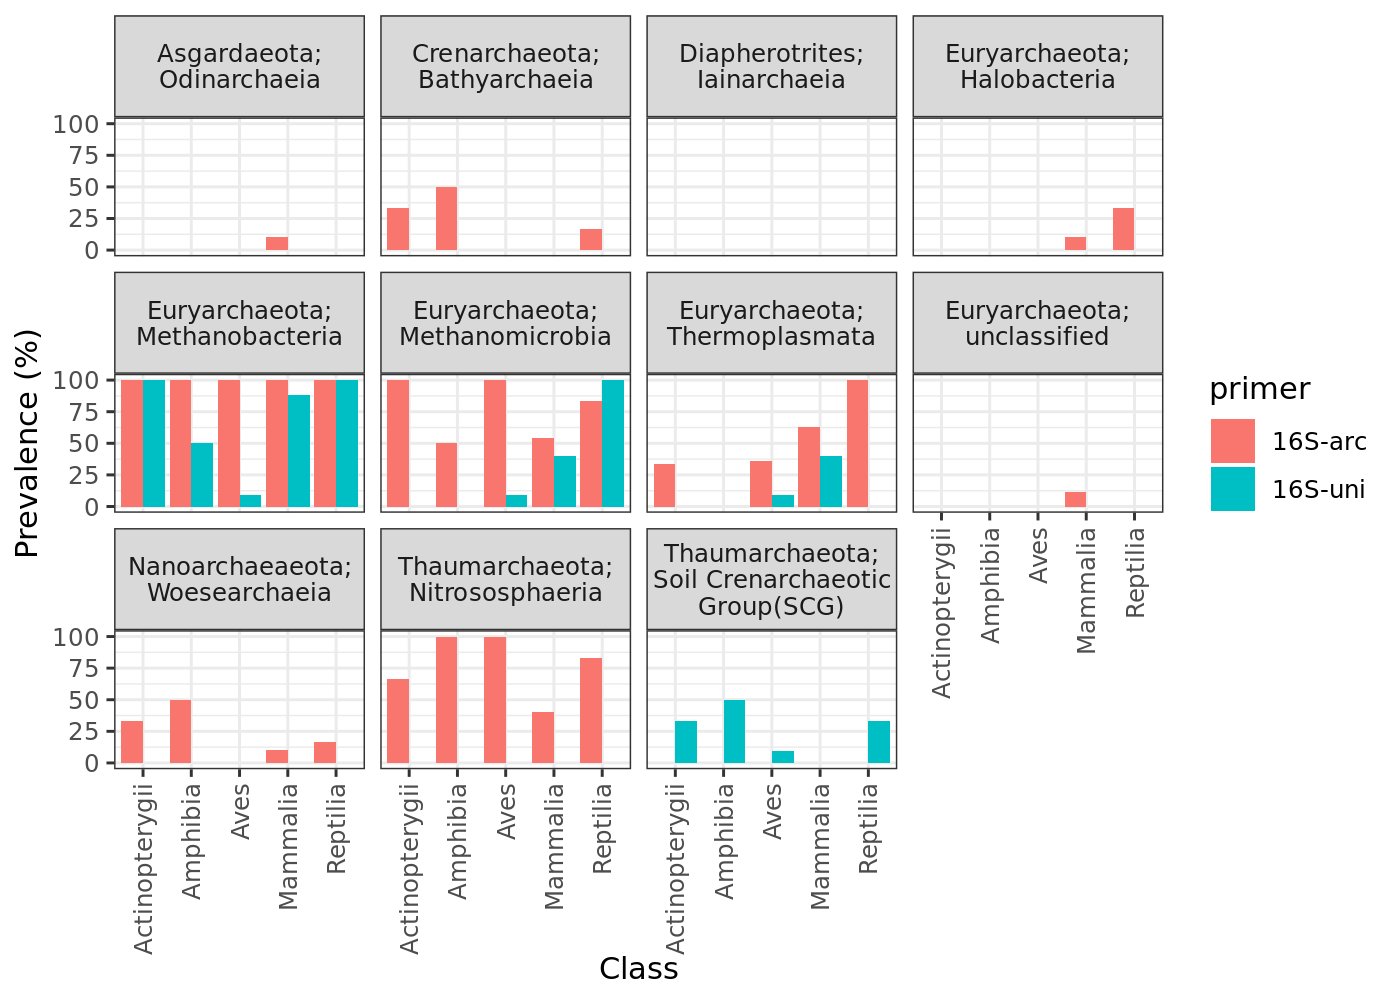

In [33]:
# plotting
p = df_s %>%
    mutate(Taxonomy = stringr::str_wrap(Taxonomy, 20)) %>%
    ggplot(aes(class, prev, fill=primer)) +
    geom_bar(stat='identity', position='dodge') +
    labs(x='Class', y='Prevalence (%)') +
    facet_wrap(~ Taxonomy) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.5)
    )

p.dims(7,5)
plot(p)

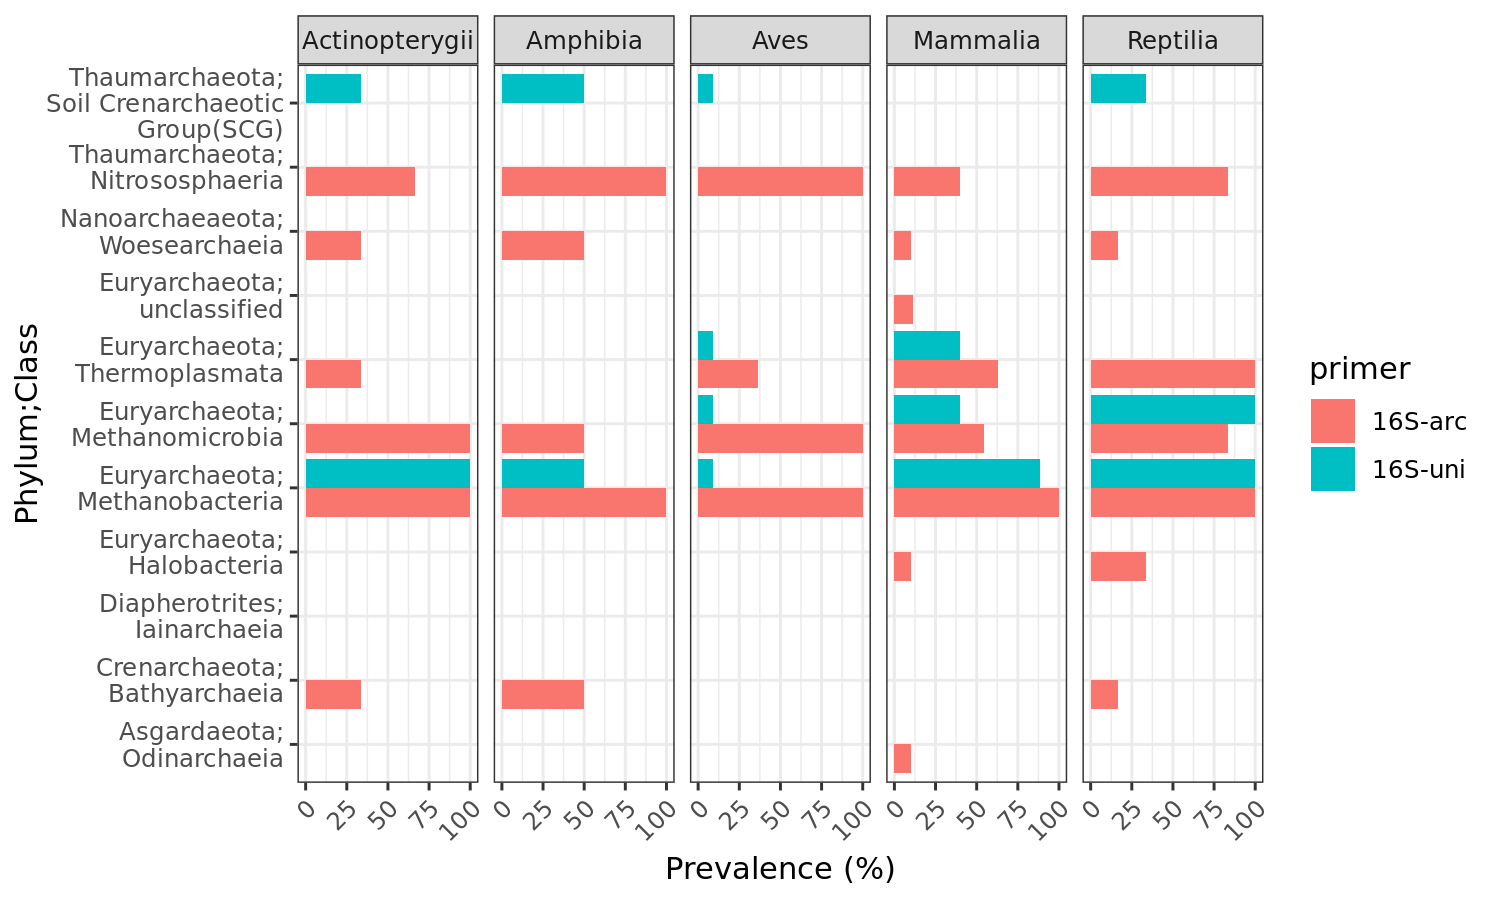

In [34]:
# plotting
p = df_s %>%
    mutate(Taxonomy = stringr::str_wrap(Taxonomy, 20)) %>%
    ggplot(aes(Taxonomy, prev, fill=primer)) +
    geom_bar(stat='identity', position='dodge') +
    labs(x='Phylum;Class', y='Prevalence (%)') +
    coord_flip() +
    facet_grid(. ~ class) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

p.dims(7.5,4.5)
plot(p)

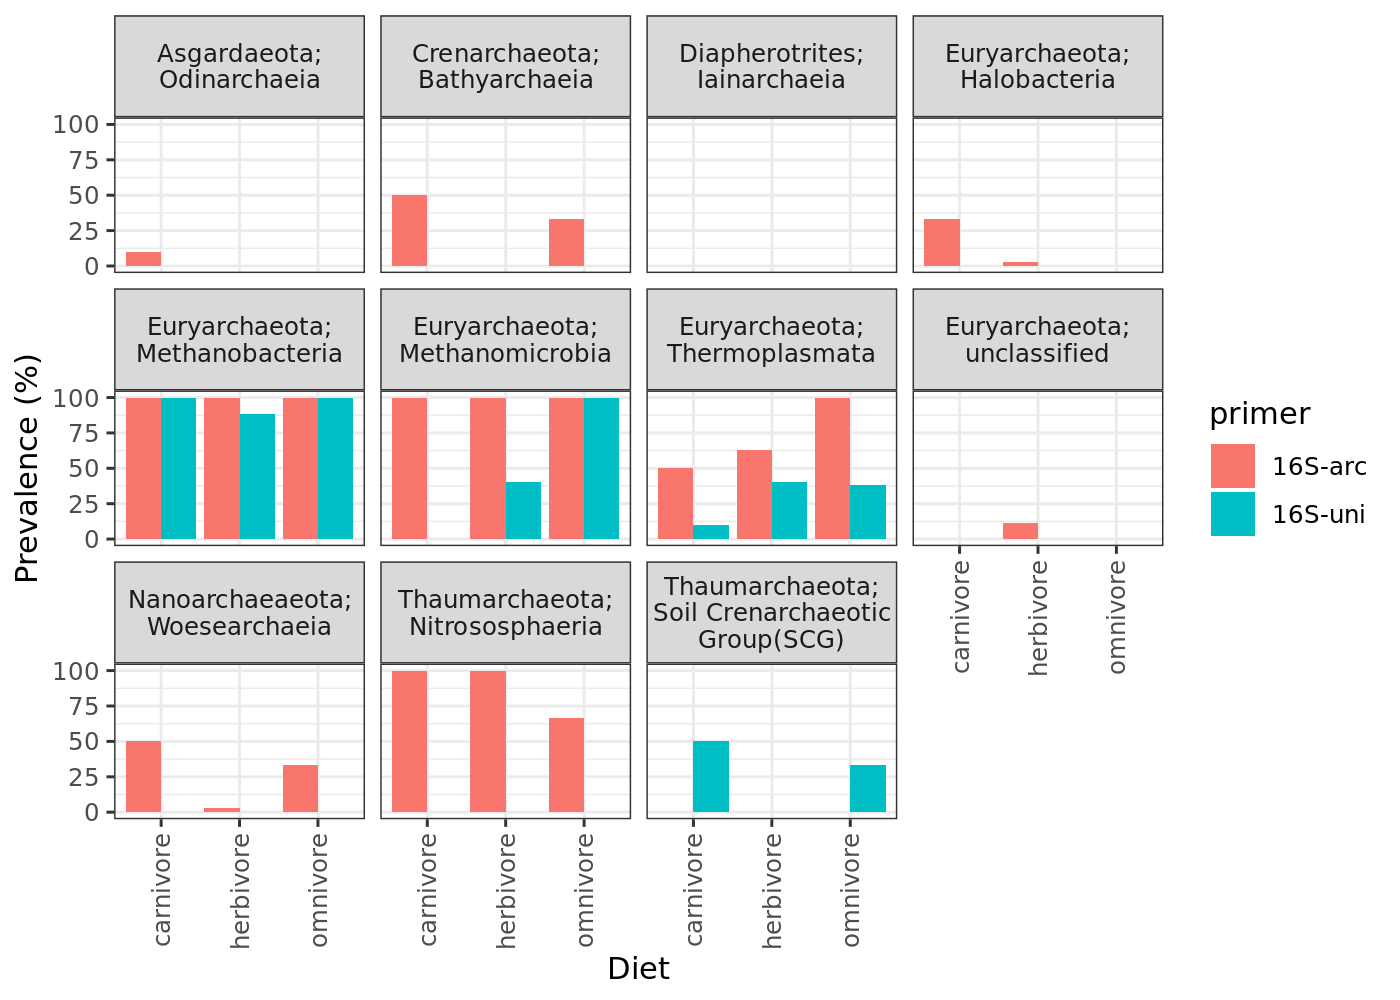

In [35]:
# plotting
p = df_s %>%
    mutate(Taxonomy = stringr::str_wrap(Taxonomy, 20)) %>%
    ggplot(aes(diet, prev, fill=primer)) +
    geom_bar(stat='identity', position='dodge') +
    labs(x='Diet', y='Prevalence (%)') +
    facet_wrap(~ Taxonomy) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.5)
    )

p.dims(7,5)
plot(p)

# sessionInfo

In [36]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects/Georg_animal_feces/envs/phyloseq/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] LeyLabRMisc_0.1.6 phyloseq_1.30.0   ggplot2_3.3.1     tidyr_1.1.0      
[5] dplyr_1.0.0      

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.4.6        ape_5.4             lattice_0.20-41    
 [4] Biostrings_2.54.0   digest_0.6.25       foreach_1.5.0      
 [7] IRdisp